# Problem Statement:
#### Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

# Import Libaries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1.Read the data set

In [0]:
# run this cell to upload file if you are using google colab
from google.colab import files
files.upload()

Saving bank.csv to bank.csv


{'bank.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,1

Data info:
The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc.

In [0]:
df_bank=pd.read_csv('bank.csv')

In [0]:
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Drop the columns which are unique for all users like IDs 

In [0]:
df_bank.drop(['RowNumber','Surname'],axis=1,inplace=True)

In [0]:
df_bank.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df_bank.shape

(10000, 14)

In [0]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CustomerId         10000 non-null int64
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Check for NULL

In [0]:
df_bank.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### No missing value

## Analysize Target

In [0]:
df_bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

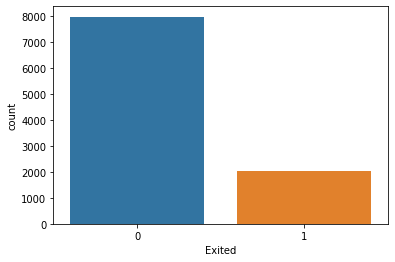

In [0]:
sns.countplot(df_bank['Exited'])

1 is defaulter and 0 is non defaulter.

As seen there are more non_defaulter as compared to defaulters

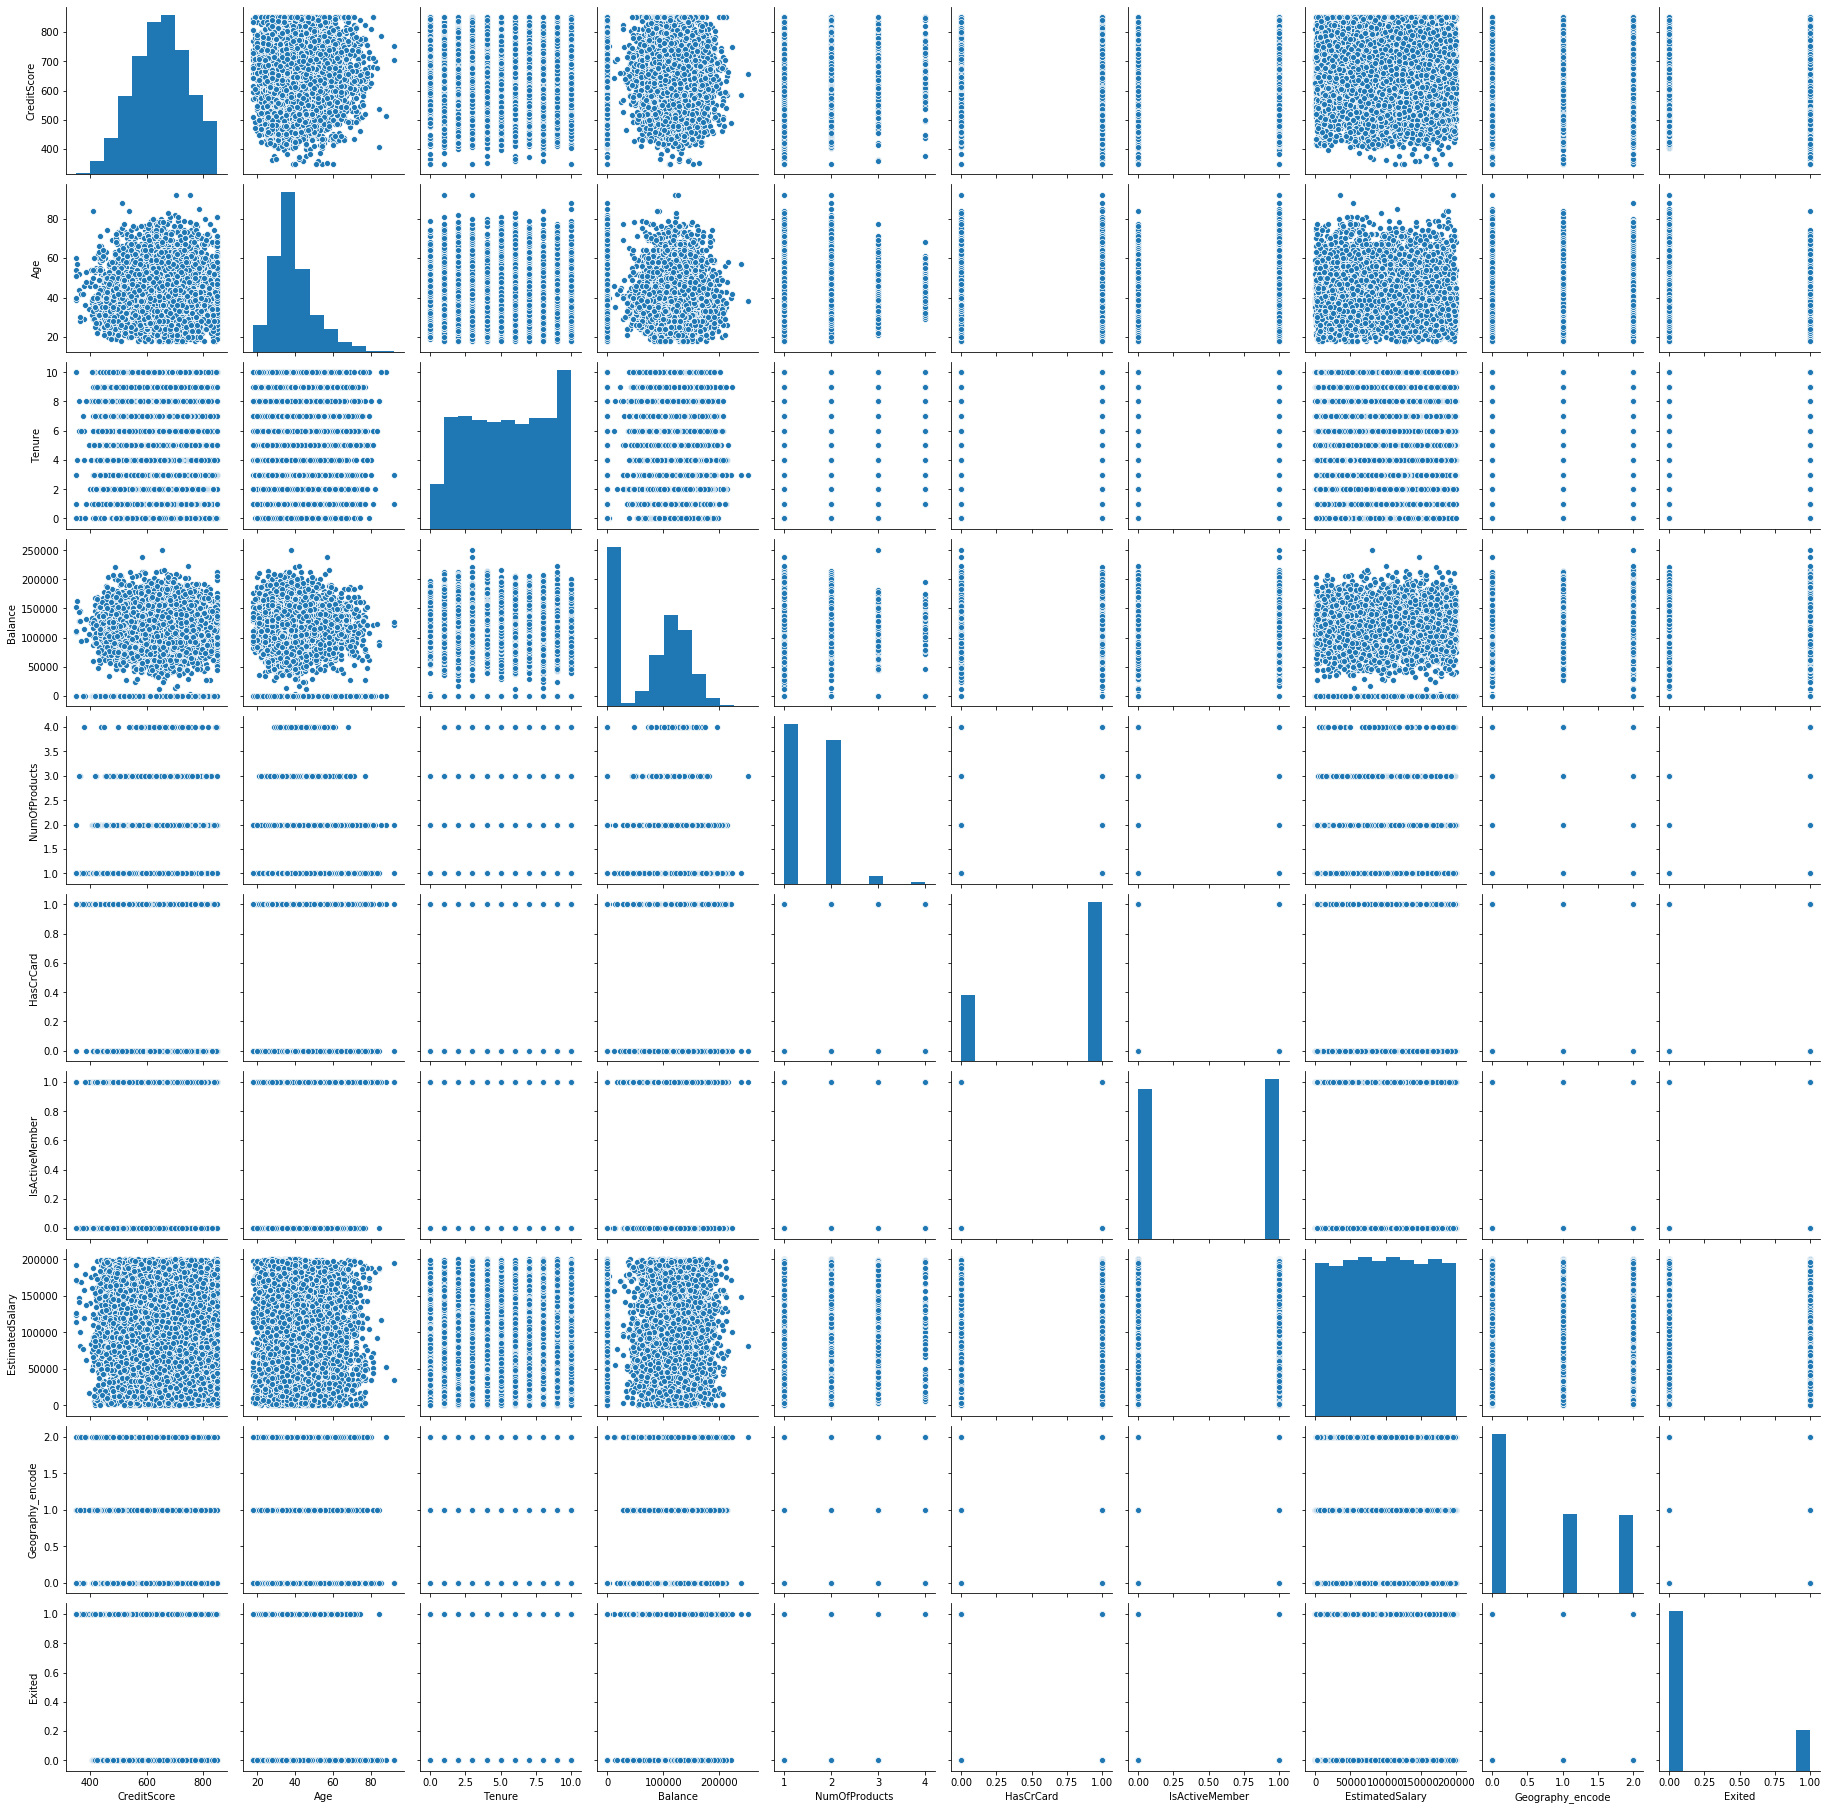

In [0]:
sns.pairplot(df_bank[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender','Geography_encode','Exited']])

In [0]:
#Change object to category

In [0]:
df_bank['Gender']=df_bank['Gender'].astype('category')
df_bank['Geography']=df_bank['Geography'].astype('category')

In [0]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CustomerId         10000 non-null int64
CreditScore        10000 non-null int64
Geography          10000 non-null category
Gender             10000 non-null category
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: category(2), float64(2), int64(8)
memory usage: 801.1 KB


## Encode category variables

In [0]:
df_bank['gender_encode']=pd.Categorical(df_bank['Gender']).codes
df_bank['Geography_encode']=pd.Categorical(df_bank['Geography']).codes

In [0]:
df_bank['Gender'].unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [0]:
df_bank['gender_encode'].unique()

array([0, 1])

In [0]:
df_bank['Geography'].unique()

[France, Spain, Germany]
Categories (3, object): [France, Spain, Germany]

In [0]:
df_bank['Geography_encode'].unique()

array([0, 2, 1])

In [0]:
df_bank[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','gender_encode','Geography_encode']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_encode,Geography_encode
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.545700,0.746300
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.497932,0.827529
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000


# 3. Distinguish the feature and target set

In [0]:
X=df_bank[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','gender_encode','Geography_encode']]
Y=np.array(df_bank['Exited'])

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore         10000 non-null int64
Age                 10000 non-null int64
Tenure              10000 non-null int64
Balance             10000 non-null float64
NumOfProducts       10000 non-null int64
HasCrCard           10000 non-null int64
IsActiveMember      10000 non-null int64
EstimatedSalary     10000 non-null float64
gender_encode       10000 non-null int8
Geography_encode    10000 non-null int8
dtypes: float64(2), int64(6), int8(2)
memory usage: 644.7 KB


In [0]:
X.shape

(10000, 10)

In [0]:
Y

array([1, 0, 1, ..., 1, 1, 0])

# 4.Divide the data set into training and test sets

In [0]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [0]:
#Since there is a data imbalace ,thus imputing data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
print('X_train',X_ros.shape)
print('y_train',y_ros.shape)

X_train (11094, 10)
y_train (11094,)


In [0]:
X_test.shape

(3000, 10)

In [0]:
y_test.shape

(3000,)

# 5.Normalize the train and test data

In [0]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_ros)

# Scale the train set
X_train = scaler.transform(X_ros)

# Scale the test set
X_test = scaler.transform(X_test)

# 6.Initialize & build the model 

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(11, activation='sigmoid', input_shape=(10,)))

# Add one hidden layer 
model.add(Dense(6, activation='sigmoid'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [0]:
l

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                121       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [124]:
#model.compile(loss='squared_hinge',
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_ros, y_ros,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4355 - acc: 0.7969
Epoch 2/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4352 - acc: 0.7947
Epoch 3/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4352 - acc: 0.7978
Epoch 4/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4340 - acc: 0.7996
Epoch 5/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4336 - acc: 0.7959
Epoch 6/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4331 - acc: 0.7992
Epoch 7/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4330 - acc: 0.7994
Epoch 8/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4323 - acc: 0.7990
Epoch 9/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4317 - acc: 0.7986
Epoch 10/10
11094/11094 [==============================] - 14s 1ms/step - loss: 0.4311 - acc: 0.7995

# 7.Predict the results using 0.5 as a threshold

In [0]:
y_pred=model.predict(X_test)

In [126]:
y_pred[0:11]  

array([[0.1404671 ],
       [0.04502824],
       [0.17089823],
       [0.35392058],
       [0.22937426],
       [0.07351515],
       [0.2824704 ],
       [0.623885  ],
       [0.6524214 ],
       [0.72740334],
       [0.83923954]], dtype=float32)

In [0]:
pred = lambda x : 1 if (x > 0.5) else 0
y_final = np.array([pred(i) for i in y_pred])

In [128]:
y_final[0:11]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [129]:
y_test[0:11]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

# 8.Print the Accuracy score and Confusion Matrix 

In [130]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
print(accuracy_score(y_test,y_final))

0.8206666666666667


In [131]:
#confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_final, labels=[0 ,1]), index=['true:non_default', 'true:default'], columns=['pred:non_default', 'pred:default']))

                  pred:non_default  pred:default
true:non_default              2051           365
true:default                   173           411


In [132]:
print(recall_score(y_test,y_final))

0.7037671232876712


# Checking with only the original data

In [0]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [147]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (7000, 10)
y_train (7000,)


In [0]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# 6.Initialize & build the model 

In [142]:
#model.compile(loss='squared_hinge',
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4693 - acc: 0.7893
Epoch 2/10
7000/7000 [==============================] - 10s 1ms/step - loss: 0.4373 - acc: 0.8011
Epoch 3/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4322 - acc: 0.8144
Epoch 4/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4271 - acc: 0.8269
Epoch 5/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4220 - acc: 0.8300
Epoch 6/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4176 - acc: 0.8297
Epoch 7/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4142 - acc: 0.8313
Epoch 8/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4087 - acc: 0.8334
Epoch 9/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.4025 - acc: 0.8367
Epoch 10/10
7000/7000 [==============================] - 9s 1ms/step - loss: 0.3945 - acc: 0.8389


# 7.Predict the results using 0.5 as a threshold

In [0]:
y_pred=model.predict(X_test)
pred = lambda x : 1 if (x > 0.5) else 0
y_final = np.array([pred(i) for i in y_pred])

# 8.Print the Accuracy score and Confusion Matrix 

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
print(accuracy_score(y_test,y_final))

0.8493333333333334


In [145]:
#confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_final, labels=[0 ,1]), index=['true:non_default', 'true:default'], columns=['pred:non_default', 'pred:default']))

                  pred:non_default  pred:default
true:non_default              2330            86
true:default                   366           218


In [146]:
print(recall_score(y_test,y_final))

0.3732876712328767


### As Seen the accuracy is more (84.9%) when original data is used without any data imputation but has a very low recall score of 0.37.

###  When the dataset used for training is imputed with balanced ratio of defaulters and non defaulters records the accuracy(82.06%) slightly reduces  but has a very good recall score (0.70).

### Hence the model trained with imputed data needs to be proposed especially in this case, when the objective is to find the defaulters.